In [1]:
import time
start_time = time.time()
import os
HOME = os.environ['HOME']
# os.chdir(f'{HOME}/desktop/LTT1445_fits_files/Test/Tes2/Tes3/Tes4')
# os.chdir(f'{HOME}/desktop/LTT1445_fits_files/Test/Tes2/Tes3')                    #2nd epoch
os.chdir(f'{HOME}/desktop/LTT1445_fits_files/Test/Tes2')                         #1st epoch

In [2]:
import joblib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.stats import mad_std, sigma_clip
import warnings
warnings.filterwarnings("ignore")

import exoplanet as xo

from arctor3 import Arctor, info_message

In [3]:
transit1 = [0,512,300,513]
transit2 = [0,512,178,220]
transit3 = [0,512,150,180]

In [4]:
def instantiate_arctor(planet_name, transit, data_dir, working_dir, file_type):
    planet = Arctor(
        planet_name=planet_name,
        data_dir=data_dir,
        working_dir=working_dir,
        file_type=file_type)

    joblib_filename = f'{planet_name}_savedict.joblib.save'
    joblib_filename = f'{working_dir}/{joblib_filename}'
    if os.path.exists(joblib_filename):
        info_message('Loading Data from Save File')
        planet.load_data(joblib_filename)
    else:
        info_message('Loading New Data Object')
        planet.load_data(transit)

    return planet

def create_raw_lc_stddev(planet):
    ppm = 1e6
    phot_vals = planet.photometry_df
    lc_std_rev = phot_vals.iloc[planet.idx_rev].std(axis=0)                
    lc_std_fwd = phot_vals.iloc[planet.idx_fwd].std(axis=0)                

    lc_med_rev = np.median(phot_vals.iloc[planet.idx_rev], axis=0)
    lc_med_fwd = np.median(phot_vals.iloc[planet.idx_rev], axis=0)

    lc_std = np.mean([lc_std_rev, lc_std_fwd], axis=0)
    lc_med = np.mean([lc_med_rev, lc_med_fwd], axis=0)

    return lc_std / lc_med * ppm

In [5]:
plot_verbose = False
save_now = False
planet_name = 'PlanetName'
file_type = 'flt.fits'

HOME = os.environ['HOME']
# base_dir = os.path.join(HOME, 'path', 'to', 'base')
# data_dir = os.path.join(base_dir, 'path', 'to', 'data')
# data_dir = os.path.join(data_dir, 'HST', 'FLTs')
# working_dir = os.path.join(base_dir, 'path', 'to', 'savefiles')
# base_dir = os.path.join(HOME, 'desktop', 'LTT1445_fits_files', 'Test', 'Tes2', 'Tes3')        #2nd epoch
base_dir = os.path.join(HOME, 'desktop', 'LTT1445_fits_files', 'Test', 'Tes2')                #1st epoch
data_dir = os.path.join(base_dir)
data_dir = os.path.join(data_dir)
working_dir = os.path.join(base_dir)

In [6]:
transit = transit3
planet = instantiate_arctor(planet_name, transit, data_dir, working_dir, file_type)
print(planet)

[INFO] Initializing Instance of the `Arctor` Object
[INFO] Loading New Data Object
[INFO] Loading Fits Files


100%|██████████████████████████████████████████████████████████████████████████████████| 94/94 [00:00<00:00, 251.37it/s]


[INFO] Creating New Flux/Error/Time Attributes


100%|██████████████████████████████████████████████████████████████████████████████████| 94/94 [00:00<00:00, 122.35it/s]

[INFO] Found 94 flt.fits files


In [7]:
planet.clean_cosmic_rays()
planet.calibration_trace_location()
planet.identify_trace_direction()
planet.simple_phots()
planet.center_all_traces()
planet.fit_trace_slopes()
planet.compute_sky_background(subpixels=32)
planet.compute_columnwise_sky_background()

[INFO] Flagging Cosmic Rays using `Temporal Simple` Technique


100%|███████████████████████████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 18.53it/s]


[INFO] Cosmic Ray Mask Creation Took 1.6253783702850342 seconds
None
[INFO] Calibration the Median Trace Location
[INFO] Cubic Spline Interpolating the Median Trace Location
[INFO] Calibration the Per Image Trace Location


100%|█████████████████████████████████████████████████████████████████████████████████| 94/94 [00:00<00:00, 1520.90it/s]


[INFO] Identifying Trace Direction per Image


100%|█████████████████████████████████████████████████████████████████████████████████| 94/94 [00:00<00:00, 2832.65it/s]


[INFO] Computing the Center of the Trace


100%|███████████████████████████████████████████████████████████████████████████████████| 94/94 [00:14<00:00,  6.27it/s]


[INFO] Fitting a slope to the Center of the Trace


100%|██████████████████████████████████████████████████████████████████████████████████| 94/94 [00:00<00:00, 584.47it/s]


In [8]:
# Set up the list of aperture widths and heights to search
min_aper_width = 1
max_aper_width = 100
min_aper_height = 1
max_aper_height = 100

aper_widths = np.arange(min_aper_width, max_aper_width + 2, 5)
aper_heights = np.arange(min_aper_height, max_aper_height + 2, 5)

In [9]:
planet.do_multi_phot(aper_widths, aper_heights)
print("code took", (time.time()-start_time)/60, "minutes")

[INFO] Beginning Multi-Aperture Photometry
[INFO] Creating Apertures


100%|███████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 93.32it/s]

[INFO] Configuing Photoutils.Aperture_Photometry
[INFO] Computing Aperture Photometry per Image


[INFO] Aperture Photometry per Image took 134.23316884040833 seconds for 41454 apertures.
[INFO] Restructuring Aperture Photometry into DataFrames
    aperture_sum_1x1  aperture_sum_6x1  aperture_sum_11x1  aperture_sum_16x1  \
0       1.259832e+06      1.259832e+06       1.259832e+06       1.259832e+06   
1       1.416516e+06      1.416516e+06       1.416516e+06       1.416516e+06   
2       1.270787e+06      1.270787e+06       1.270787e+06       1.270787e+06   
3       1.435300e+06      1.435300e+06       1.435300e+06       1.435300e+06   
4       1.278903e+06      1.278903e+06       1.278903e+06       1.278903e+06   
..               ...               ...                ...                ...   
89      1.273257e+06      1.273257e+06       1.273257e+06       1.273257e+06   
90      1.227886e+06      1.227886e+06       1.227886e+06       1.227886e+06   
91      1.275050e+06      1.275050e+06       1.275050e+06       1.275050e+06   
92      1.231917e+06      1.231917e+06       1.231917

In [10]:
planet_coarse_photometry_df = planet.photometry_df.copy()
planet.photometry_df


,aperture_sum_1x1,aperture_sum_6x1,aperture_sum_11x1,aperture_sum_16x1,aperture_sum_21x1,aperture_sum_26x1,aperture_sum_31x1,aperture_sum_36x1,aperture_sum_41x1,aperture_sum_46x1,...,aperture_sum_56x101,aperture_sum_61x101,aperture_sum_66x101,aperture_sum_71x101,aperture_sum_76x101,aperture_sum_81x101,aperture_sum_86x101,aperture_sum_91x101,aperture_sum_96x101,aperture_sum_101x101
0,1.259832e+06,1.259832e+06,1.259832e+06,1.259832e+06,1.259832e+06,1.259832e+06,1.259832e+06,1.259832e+06,1.259832e+06,1.259832e+06,...,4.399065e+06,4.399065e+06,4.399065e+06,4.399065e+06,4.399065e+06,4.399065e+06,4.399065e+06,4.399065e+06,4.399065e+06,4.399065e+06
1,1.416516e+06,1.416516e+06,1.416516e+06,1.416516e+06,1.416516e+06,1.416516e+06,1.416516e+06,1.416516e+06,1.416516e+06,1.416516e+06,...,4.399139e+06,4.399139e+06,4.399139e+06,4.399139e+06,4.399139e+06,4.399139e+06,4.399139e+06,4.399139e+06,4.399139e+06,4.399139e+06
2,1.270787e+06,1.270787e+06,1.270787e+06,1.270787e+06,1.270787e+06,1.270787e+06,1.270787e+06,1.270787e+06,1.270787e+06,1.270787e+06,...,4.402740e+06,4.402740e+06,4.402740e+06,4.402740e+06,4.402740e+06,4.402740e+06,4.402740e+06,4.402740e+06,4.402740e+06,4.402740e+06
3,1.435300e+06,1.435300e+06,1.435300e+06,1.435300e+06,1.435300e+06,1.435300e+06,1.435300e+06,1.435300e+06,1.435300e+06,1.435300e+06,...,4.401256e+06,4.401256e+06,4.401256e+06,4.401256e+06,4.401256e+06,4.401256e+06,4.401256e+06,4.401256e+06,4.401256e+06,4.401256e+06
4,1.278903e+06,1.278903e+06,1.278903e+06,1.278903e+06,1.278903e+06,1.278903e+06,1.278903e+06,1.278903e+06,1.278903e+06,1.278903e+06,...,4.410314e+06,4.410314e+06,4.410314e+06,4.410314e+06,4.410314e+06,4.410314e+06,4.410314e+06,4.410314e+06,4.410314e+06,4.410314e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,1.273257e+06,1.273257e+06,1.273257e+06,1.273257e+06,1.273257e+06,1.273257e+06,1.273257e+06,1.273257e+06,1.273257e+06,1.273257e+06,...,4.397795e+06,4.397795e+06,4.397795e+06,4.397795e+06,4.397795e+06,4.397795e+06,4.397795e+06,4.397795e+06,4.397795e+06,4.397795e+06
90,1.227886e+06,1.227886e+06,1.227886e+06,1.227886e+06,1.227886e+06,1.227886e+06,1.227886e+06,1.227886e+06,1.227886e+06,1.227886e+06,...,4.382116e+06,4.382116e+06,4.382116e+06,4.382116e+06,4.382116e+06,4.382116e+06,4.382116e+06,4.382116e+06,4.382116e+06,4.382116e+06
91,1.275050e+06,1.275050e+06,1.275050e+06,1.275050e+06,1.275050e+06,1.275050e+06,1.275050e+06,1.275050e+06,1.275050e+06,1.275050e+06,...,4.381505e+06,4.381505e+06,4.381505e+06,4.381505e+06,4.381505e+06,4.381505e+06,4.381505e+06,4.381505e+06,4.381505e+06,4.381505e+06
92,1.231917e+06,1.231917e+06,1.231917e+06,1.231917e+06,1.231917e+06,1.231917e+06,1.231917e+06,1.231917e+06,1.231917e+06,1.231917e+06,...,4.392994e+06,4.392994e+06,4.392994e+06,4.392994e+06,4.392994e+06,4.392994e+06,4.392994e+06,4.392994e+06,4.392994e+06,4.392994e+06


In [11]:
coarse_snr_lightcurves = create_raw_lc_stddev(planet)
coarse_min_snr = coarse_snr_lightcurves[coarse_snr_lightcurves.argmin()]
coarse_min_snr_colname = planet.photometry_df.columns[coarse_snr_lightcurves.argmin()]
coarse_min_snr_col = planet.normed_photometry_df[coarse_min_snr_colname]
coarse_temp = coarse_min_snr_colname.split('_')[-1].split('x')
coarse_min_snr_aper_width, coarse_min_snr_aper_height = np.int32(coarse_temp)

In [12]:
info_message(f'Coarse Aperture Photometry Resulted in {coarse_min_snr:0.0f}ppm with '
             f'{coarse_min_snr_aper_width}x{coarse_min_snr_aper_height} aperture size')

[INFO] Coarse Aperture Photometry Resulted in 1652ppm with 6x96 aperture size


In [13]:
fine_buffer = 10
fine_aper_widths = np.arange(coarse_min_snr_aper_width - fine_buffer,
                             coarse_min_snr_aper_width + fine_buffer)

fine_aper_heights = np.arange(coarse_min_snr_aper_height - fine_buffer,
                              coarse_min_snr_aper_height + fine_buffer)

In [14]:
planet.do_multi_phot(fine_aper_widths, fine_aper_heights)

[INFO] Beginning Multi-Aperture Photometry
[INFO] Creating Apertures


100%|███████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 65.97it/s]

[INFO] Configuing Photoutils.Aperture_Photometry
[INFO] Computing Aperture Photometry per Image


[INFO] Aperture Photometry per Image took 110.24739003181458 seconds for 37600 apertures.
[INFO] Restructuring Aperture Photometry into DataFrames
    aperture_sum_-4x86  aperture_sum_-3x86  aperture_sum_-2x86  \
0         3.807302e+06        3.954176e+06        4.101366e+06   
1         3.810141e+06        3.957200e+06        4.104103e+06   
2         3.812812e+06        3.959892e+06        4.106411e+06   
3         3.809774e+06        3.956579e+06        4.104174e+06   
4         3.819313e+06        3.966694e+06        4.113363e+06   
..                 ...                 ...                 ...   
89        3.804721e+06        3.952663e+06        4.100616e+06   
90        3.792754e+06        3.939608e+06        4.085931e+06   
91        3.795952e+06        3.941746e+06        4.088172e+06   
92        3.810507e+06        3.955905e+06        4.100704e+06   
93        3.810834e+06        3.956042e+06        4.101620e+06   

    aperture_sum_-1x86  aperture_sum_0x86  aperture_sum_1x86

[INFO] Adding column aperture_sum_-1x91 to self.photometry_df
[INFO] Adding column aperture_sum_0x91 to self.photometry_df
[INFO] Adding column aperture_sum_2x91 to self.photometry_df
[INFO] Adding column aperture_sum_3x91 to self.photometry_df
[INFO] Adding column aperture_sum_4x91 to self.photometry_df
[INFO] Adding column aperture_sum_5x91 to self.photometry_df
[INFO] Adding column aperture_sum_7x91 to self.photometry_df
[INFO] Adding column aperture_sum_8x91 to self.photometry_df
[INFO] Adding column aperture_sum_9x91 to self.photometry_df
[INFO] Adding column aperture_sum_10x91 to self.photometry_df
[INFO] Adding column aperture_sum_12x91 to self.photometry_df
[INFO] Adding column aperture_sum_13x91 to self.photometry_df
[INFO] Adding column aperture_sum_14x91 to self.photometry_df
[INFO] Adding column aperture_sum_15x91 to self.photometry_df
[INFO] Adding column aperture_sum_-4x92 to self.photometry_df
[INFO] Adding column aperture_sum_-3x92 to self.photometry_df
[INFO] Adding co

[INFO] Adding column aperture_sum_0x98 to self.photometry_df
[INFO] Adding column aperture_sum_1x98 to self.photometry_df
[INFO] Adding column aperture_sum_2x98 to self.photometry_df
[INFO] Adding column aperture_sum_3x98 to self.photometry_df
[INFO] Adding column aperture_sum_4x98 to self.photometry_df
[INFO] Adding column aperture_sum_5x98 to self.photometry_df
[INFO] Adding column aperture_sum_6x98 to self.photometry_df
[INFO] Adding column aperture_sum_7x98 to self.photometry_df
[INFO] Adding column aperture_sum_8x98 to self.photometry_df
[INFO] Adding column aperture_sum_9x98 to self.photometry_df
[INFO] Adding column aperture_sum_10x98 to self.photometry_df
[INFO] Adding column aperture_sum_11x98 to self.photometry_df
[INFO] Adding column aperture_sum_12x98 to self.photometry_df
[INFO] Adding column aperture_sum_13x98 to self.photometry_df
[INFO] Adding column aperture_sum_14x98 to self.photometry_df
[INFO] Adding column aperture_sum_15x98 to self.photometry_df
[INFO] Adding colu

[INFO] Adding column aperture_sum_0x105 to self.photometry_df
[INFO] Adding column aperture_sum_1x105 to self.photometry_df
[INFO] Adding column aperture_sum_2x105 to self.photometry_df
[INFO] Adding column aperture_sum_3x105 to self.photometry_df
[INFO] Adding column aperture_sum_4x105 to self.photometry_df
[INFO] Adding column aperture_sum_5x105 to self.photometry_df
[INFO] Adding column aperture_sum_6x105 to self.photometry_df
[INFO] Adding column aperture_sum_7x105 to self.photometry_df
[INFO] Adding column aperture_sum_8x105 to self.photometry_df
[INFO] Adding column aperture_sum_9x105 to self.photometry_df
[INFO] Adding column aperture_sum_10x105 to self.photometry_df
[INFO] Adding column aperture_sum_11x105 to self.photometry_df
[INFO] Adding column aperture_sum_12x105 to self.photometry_df
[INFO] Adding column aperture_sum_13x105 to self.photometry_df
[INFO] Adding column aperture_sum_14x105 to self.photometry_df
[INFO] Adding column aperture_sum_15x105 to self.photometry_df


In [15]:
planet_fine_photometry_df = planet.photometry_df.copy()

In [16]:
fine_snr_lightcurves = create_raw_lc_stddev(planet)
fine_min_snr = fine_snr_lightcurves[fine_snr_lightcurves.argmin()]
fine_min_snr_colname = planet.photometry_df.columns[fine_snr_lightcurves.argmin()]
fine_min_snr_flux = planet.normed_photometry_df[fine_min_snr_colname]
fine_min_snr_uncs = planet.normed_uncertainty_df[fine_min_snr_colname]
fine_temp = fine_min_snr_colname.split('_')[-1].split('x')
fine_min_snr_aper_width, fine_min_snr_aper_height = np.int32(fine_temp)

In [17]:
info_message(f'Fine Aperture Photometry Resulted in {fine_min_snr:0.0f}ppm with '
             f'{fine_min_snr_aper_width}x{fine_min_snr_aper_height} aperture size; '
             f'with median uncertainties of {np.median(fine_min_snr_uncs)*1e6:0.0f} ppm')

[INFO] Fine Aperture Photometry Resulted in 1652ppm with 4x93 aperture size; with median uncertainties of 477 ppm


In [18]:
data_df = pd.DataFrame()
data_df['flux'] = fine_min_snr_flux.values
data_df['unc'] = fine_min_snr_uncs.values
data_df['times'] = planet.times
idx_fwd = planet.idx_fwd
idx_rev = planet.idx_rev
# data_df.sort_values('times', inplace=True)
# data_df = data_df.reset_index()
# data_df.drop(['index'], axis=1, inplace=True)
data_df

,flux,unc,times
0,0.999450,0.000477,59483.485144
1,0.999798,0.000477,59483.486024
2,1.000306,0.000477,59483.486904
3,1.000251,0.000477,59483.487783
4,1.002000,0.000477,59483.488663
...,...,...,...
89,0.999444,0.000477,59483.639577
90,0.995614,0.000476,59483.640457
91,0.995792,0.000476,59483.641336
92,0.998093,0.000476,59483.642216


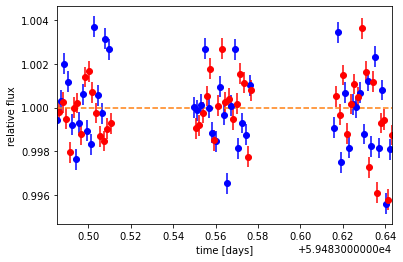

In [19]:
# Compute a limb-darkened light curve using starry
t = data_df['times']
u = []
flux = data_df['flux']
yerr = data_df['unc']
# Note: the `eval` is needed because this is using Theano in
# the background

plt.errorbar(t[idx_fwd], flux[idx_fwd], yerr[idx_fwd], fmt='o', color="b")
plt.errorbar(t[idx_rev], flux[idx_rev], yerr[idx_rev], fmt='o', color="r")
plt.axhline(1.0, ls='--', color='C1')
plt.ylabel("relative flux")
plt.xlabel("time [days]")
plt.xlim(t.min(), t.max());

In [20]:
fluxppm = (data_df['flux'] - 1)*1e6

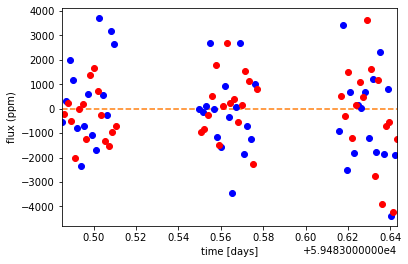

In [21]:
plt.errorbar(t[idx_fwd], fluxppm[idx_fwd], yerr[idx_fwd], fmt='o', color="b")
plt.errorbar(t[idx_rev], fluxppm[idx_rev], yerr[idx_rev], fmt='o', color="r")
plt.axhline(1.0, ls='--', color='C1')
plt.ylabel("flux (ppm)")
plt.xlabel("time [days]")
plt.xlim(t.min(), t.max());

In [22]:
print("code took", (time.time()-start_time)/60, "minutes")

code took 5.113674342632294 minutes
